Student #: 13443783

**Question 1: The Lady Gets Tired After Awhile**

In [ ]:
import numpy as np

numberOfTries = 20
correctlyGuessed = 13
startingProb = 0.5 # Reasonable 50% chance of getting it right to start with
all_trials = []

for j in range(1000):
  trial = []
  for i in range(numberOfTries):
    cup = np.random.random() < startingProb 
    startingProb -= startingProb/(numberOfTries) # Decrease Probability of Success As Expt Proceeds
    trial.append(cup)
  correct = sum(trial)
  all_trials.append(correct)
  startingProb = 0.5 # Reset Starting Probability Here When Inner Loop Completes

accumulator = 0
for i in all_trials:
  if i == correctlyGuessed:
    accumulator += 1

accumulator / 1000

0.002

In the previous problem set, we made an assumption that is likely false. The assumption was that Lady Bristol has the same probability of guessing every cup correctly throughout the experiment. Due to human nature, this not not entirely correct as we tend to get tired over time and our ability to discern things decreases as a result. In the code provided above I have set the starting probability of success to 0.5 which is a reasonable number since it is just a 50/50 chance that she manages to guess the cup correctly. Then inside the inner for loop I progressively decrease the probability of success as the experiment proceeds (startingProb -= startingProb/(numberOfTries)) to show that she is getting tired and her ability to guess correctly is decreasing. Then after a full trial session, for example 30 guesses, the probability of success is reset to 0.5. This is because when the outer loop increments and runs its code block again, we can assume this is the start of another day where she has been completely rejuvenated. She is no longer tired since it is the start of a new testing day.

The probability that the lady gets 13 cups of tea correct out of 20 is approximately 0.0016

**Question 2: Non-Normal Processes**

In [2]:
data_set = [
149.9, 149.2, 148.0, 147.3, 152.4, 142.9, 151.8, 142.9, 164.5, 168.3, 148.0, 165.7, 149.9, 161.9,
148.0, 158.8, 150.5, 170.8, 159.4, 156.2, 154.9, 150.2, 153.0, 148.0, 160.7, 165.7, 152.4, 158.8, 
170.2, 146.1, 160.0, 149.9, 145.4, 151.1, 144.8, 150.5, 147.3, 160.7, 148.0, 160.0, 166.4, 141.6,
154.9, 160.7, 146.1, 154.3, 157.5, 161.0, 143.5, 165.7, 144.1, 161.3, 152.4, 165.7, 156.2, 152.4,
140.3, 149.2, 142.1, 160.0, 162.6, 147.3, 164.5, 148.0, 144.1, 153.0, 149.2, 168.9, 142.2, 147.3,
154.9, 167.0, 158.4, 142.9, 169.5, 162.6, 160.7, 149.2, 138.4, 161.3, 154.3, 159.4, 154.9, 156.8, 
153.7, 158.1, 149.2, 160.7, 151.8, 154.9, 158.8, 149.9, 161.3, 144.1, 163.8, 141.6, 162.6, 145.4, 
167.0, 155.6, 154.3, 160.0, 144.8, 148.6, 168.9, 150.5, 155.6, 161.9, 146.1, 162.6, 149.2, 161.3, 
156.2, 146.4, 148.6, 157.5, 152.4, 157.5, 154.3, 168.3, 145.4, 179.1, 153.0, 160.7, 149.2, 163.8, 
144.1, 157.5, 143.9, 157.5, 154.3, 154.9, 144.8, 156.2, 143.5, 146.7, 154.3, 167.6, 144.1, 145.4]

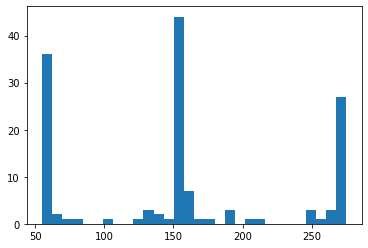

155.6718135136321 78.25085988115048


In [147]:
import numpy as np
import matplotlib.pyplot as plt

mean = np.mean(data_set)
std = np.std(data_set)
n = len(data_set)

agents = [mean] * n # their starting position will be the mean

distance = 1/50 * std   # the standard deviation needs to be adjusted
                        # by a factor of 1/50. I found that number by
                        # with the extremely rigorous technique of guessing
                        # and checking. 

tallerThreshold = 160 
shorterThreshold = 150

for j in range(1000):
    for i in range(n):
      if agents[i] > tallerThreshold:
        rand = np.random.choice([-1,1]);
        if (rand < 0):
          agents[i] = agents[i] + distance * rand
        else:
          if (agents[i] + distance * rand * 5 <= 275): 
            #tallest person ever was 272cm - so put cap at 275
            agents[i] = agents[i] + distance * rand * 5
      if agents[i] < shorterThreshold:
        rand = np.random.choice([-1,1])
        if (rand < 0):
          if (agents[i] + distance * rand * 5 >= 55):
            # can't have negative height also shortest person
            # ever is 54.6 cm - so lower height is set at 55
            agents[i] = agents[i] + distance * rand * 5
        else:
          agents[i] = agents[i] + distance * rand 
      else:      
        agents[i] = agents[i] + distance * np.random.choice([-1,1])
        
plt.hist(agents, bins=30) 
plt.show()

print(np.mean(agents),np.std(agents))

This histogram makes sense. Those whose height is below a certain threshold got even smaller and represent that first spike. The individuals within the shorter threshold and taller threshold make up the spike in the middle of the histogram. Those who exceeeded that taller threshold, grew even taller and make up that third spike on the far right. Also by introducing a non-additive component we get a histogram that no longer showcases that typical normal distribution curve. Changes in height are exaggerated in both directions through multiplication rather than addition.

**A Bayesian Approach To The Bargh Data**

In [181]:
from scipy import stats

group1 =  [9.61, 7.11, 7.88, 7.38, 7.18, 8.51,
8.68, 7.86, 9.02, 6.96, 8.13, 9.27, 8.32, 9.79]

group2 =  [7.30, 7.91, 7.53,
7.16, 6.52, 5.85, 8.45, 6.92, 7.46, 6.59, 9.26, 5.78, 7.677, 7.22]


m_grid = np.linspace(0, 15, 100)
s_grid = np.linspace(0.1, 15, 30)

oldm_prior = [1/100] * 100

for i in range(len(oldm_prior)):
  if i >= 25 and i <= 75:
    oldm_prior[i] = (oldm_prior[i] * 50) 
  else:
    oldm_prior[i] = (oldm_prior[i] / 50) 

m_prior = []
for j in oldm_prior:
  m_prior.append(j/sum(oldm_prior))

s_prior = [1/30] * 30

To clamp down on more plausible values I used the code below to generate some plots which helped show values that were very unlikely to occur. For example, student who on avg took 7-9 seconds will likely not take more than 15 seconds simply because the researchers likely controlled this --> meaning that they had specific instructions for the participants to leave and likely removed all attention grabbing elements in the hallway to prevent the participants from stopping to observe that thing. 

For the priors, I made them match the grids in terms of their length with the grids. For the m_prior, I made sure the hypotheses in the middle of the range held more weight. This is because it is less likely for the average walking speed to be super low like below 4 and super high above 11. For the s_prior, I gave each potential hypothesis equal weighting to get the best possible spread.

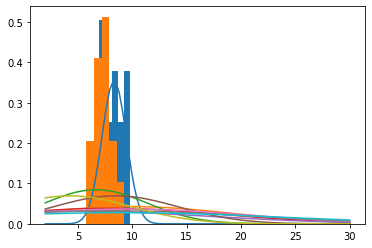

In [180]:
# Prior Predictive Plot 
x = np.linspace(2,30,100)

for i in range(10):
    m = np.random.choice(m_grid,1,p=m_prior)
    s = np.random.choice(s_grid,1,p=s_prior)
    y = stats.norm(m,s).pdf(x)
    
    plt.plot(x,y)

plt.hist(group1,bins=5,density=True)
plt.hist(group2,bins=5,density=True)
plt.show()

Contour Plot - Group 1

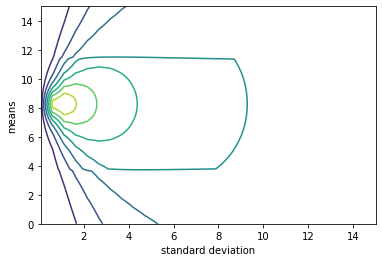

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

m_grid = np.linspace(0, 15, 100)
s_grid = np.linspace(0.1, 15, 30)

#---- priors ---
oldm_prior = [1/100] * 100
for i in range(len(oldm_prior)):
  if i >= 25 and i <= 75:
    oldm_prior[i] = (oldm_prior[i] * 50) 
  else:
    oldm_prior[i] = (oldm_prior[i] / 50) 

m_prior = []
for j in oldm_prior:
  m_prior.append(j/sum(oldm_prior))

s_prior = [1/30] * 30
# ---------------

posteriors = []

for m in range(len(m_grid)): 
    
    posterior_row = [] 
    
    for s in range(len(s_grid)):
        
        mean = m_grid[m] 
        std = s_grid[s]
        
        densities = stats.norm(mean,std).logpdf(group1)
        likelihood = np.sum(densities)
        
        joint_prior = m_prior[m] * s_prior[s]
        joint_prior = np.log(joint_prior)
        posterior = joint_prior + likelihood
        
        posterior_row.append(posterior)
        
    posteriors.append(posterior_row)

post = pd.DataFrame(posteriors,columns=s_grid,index=m_grid) 
expectation = post.values.sum()
post = post / expectation
post = 1 / post # reciprocal happens here.
post

plt.contour(post.columns, post.index, post)
plt.ylabel('means')
plt.xlabel('standard deviation')
plt.show()

Contour Plot - Group 2

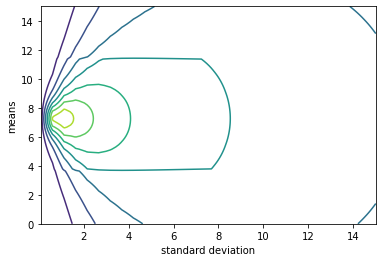

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

m_grid = np.linspace(0, 15, 100)
s_grid = np.linspace(0.1, 15, 30)

# --- priors ---
oldm_prior = [1/100] * 100
for i in range(len(oldm_prior)):
  if i >= 25 and i <= 75:
    oldm_prior[i] = (oldm_prior[i] * 50) 
  else:
    oldm_prior[i] = (oldm_prior[i] / 50) 

m_prior = []
for j in oldm_prior:
  m_prior.append(j/sum(oldm_prior))

s_prior = [1/30] * 30
# --------------

posteriors = []

for m in range(len(m_grid)): 
    
    posterior_row = [] 
    
    for s in range(len(s_grid)):
        
        mean = m_grid[m] 
        std = s_grid[s]
        
        densities = stats.norm(mean,std).logpdf(group2)
        likelihood = np.sum(densities)
        
        joint_prior = m_prior[m] * s_prior[s]
        joint_prior = np.log(joint_prior)
        posterior = joint_prior + likelihood
        
        posterior_row.append(posterior)
        
    posteriors.append(posterior_row)

post = pd.DataFrame(posteriors,columns=s_grid,index=m_grid) 
expectation = post.values.sum()
post = post / expectation
post = 1 / post # reciprocal 
post

plt.contour(post.columns, post.index, post)
plt.ylabel('means')
plt.xlabel('standard deviation')
plt.show()